## BeautifulSoup Basic examples

In [1]:
# install these libraries 
#! pip install bs4
#! pip install requests
#! pip install lxml

In [2]:
from bs4 import BeautifulSoup
import requests

In [3]:
text = """
<!DOCTYPE html>
<html>
<head>
  <title>My First HTML Page</title>
</head>
<body>
  <h1 class="title">Welcome to My Website!</h1>
</body>
</html>
"""

In [4]:
soup = BeautifulSoup(text, "lxml")
soup.find('h1', class_="title")

<h1 class="title">Welcome to My Website!</h1>

In [5]:
soup.find('h1')

<h1 class="title">Welcome to My Website!</h1>

In [6]:
# note that the results are in a list
soup.find_all('h1')

[<h1 class="title">Welcome to My Website!</h1>]

In [6]:
text = """
<!DOCTYPE html>
<html>
<head>
  <title>My Repeated Tags Example</title>
</head>
<body>
  <h2>Repeating Tags Example</h2>
  <p>This is a paragraph.</p>
  <p>This is another paragraph.</p>
  <ul>
    <li>List item 1</li>
    <li>List item 2</li>
    <li>List item 3</li>
  </ul>
  <li> JAJAJA </li>
</body>
</html>
"""

In [7]:
soup = BeautifulSoup(text, "lxml")
soup.find_all('p')

[<p>This is a paragraph.</p>, <p>This is another paragraph.</p>]

In [8]:
soup.find_all('li')

[<li>List item 1</li>,
 <li>List item 2</li>,
 <li>List item 3</li>,
 <li> JAJAJA </li>]

In [11]:
soup.find_all('ul')[0].find_all('li')

[<li>List item 1</li>, <li>List item 2</li>, <li>List item 3</li>]

Question: How to find the list elements inside the "ul" tag and avoid other "li" tags?

## Getting Covid data with BeautifulSoup

Let's figure out how to scrape some [data on the coronavirus from Wikipedia](https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory).

## Inspect the first table element

Using Chrome, go to URL:

[https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory](https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory)

and then in Chrome you can go to "View" --> "Developer" --> "View Source"

That shows you the raw HTML and what it corresponds to visually.  The next step is to use a program to extract that HTML.

## Get the raw HTML from the website

In [13]:
CovidURL = "https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory"
response = requests.get(CovidURL)
print(response.text[0:1000])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>COVID-19 pandemic by country and territory - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled";var cookie=document.cookie.match(/(?:^|; )e

## Get specific tag using BeautifulSoup

Now let's treat the text as HTML not just English text.  Then we can ask for a specific tag such as the title:

In [14]:
soup = BeautifulSoup(response.text, "lxml")
title = soup.find('title')
print("TITLE", title)

TITLE <title>COVID-19 pandemic by country and territory - Wikipedia</title>


##  Get all text elements from all HTML tags

We can also ask for all of the text elements not inside HTML tags:

In [16]:
print(soup.text[0:500].replace('\n', ' '))

   COVID-19 pandemic by country and territory - Wikipedia                                     Jump to content        Main menu      Main menu move to sidebar hide    		Navigation 	   Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate      		Contribute 	   HelpLearn to editCommunity portalRecent changesUpload file      Languages  Language links are at the top of the page across from the title.                    Search            Search         Create accountLog in      


## Find all tables

BeautifulSoup has a mechanism to find all of the tables (HTML `table` text) in an HTML document:

In [17]:
tables = soup.find_all('table')
t = str(tables[0])

In [18]:
len(tables)

69

That is raw HTML representing the table, but we can use a Jupyter notebook trick to display that text as HTML:

In [19]:
from IPython.display import HTML # IPython is the underlying Python interpreter used by this notebook
HTML(t)                          # Render the text in t as HTML

Let's get table one in a different way.

In [22]:
tables1 = soup.find_all("table", class_="infobox")

In [23]:
len(tables1)

1

In [24]:
# check that you get the same
#HTML(str(tables1[0]))

In [24]:
#tables1[0]

In [27]:
[el.text for el in tables1[0].find_all("tr")[-3:]]

['Confirmed cases769,805,366[6]',
 'Deaths6,955,484[6]',
 'Vaccinations5,621,332,009[6] (total vaccinated)5,169,098,781[6] (fully vaccinated)13,501,253,518[6] (doses administered)']

In [28]:
for el in tables1[0].find_all("tr")[-3:]:
    print(el.find('th').text, el.find('td').text)

Confirmed cases 769,805,366[6]
Deaths 6,955,484[6]
Vaccinations 5,621,332,009[6] (total vaccinated)5,169,098,781[6] (fully vaccinated)13,501,253,518[6] (doses administered)


### Death rate table

The death rate per country table is `table[12]` (found by looking at captions) and we get a nice data frame from it too:

In [42]:
len(tables)

69

In [45]:
for i in range(69):
    print(i, tables[i].find("caption"))

0 None
1 None
2 None
3 None
4 None
5 None
6 None
7 None
8 None
9 None
10 None
11 None
12 <caption><a href="/wiki/COVID-19" title="COVID-19">COVID-19</a> cases, deaths, and rates by <a class="mw-selflink selflink">location</a><sup class="reference" id="cite_ref-Template:COVID-19_datab_27-0"><a href="#cite_note-Template:COVID-19_datab-27">[22]</a></sup>
</caption>
13 <caption>2022 monthly cumulative COVID-19 deaths<sup class="reference" id="cite_ref-WHO-csv_32-0"><a href="#cite_note-WHO-csv-32">[24]</a></sup><sup class="reference" id="cite_ref-WHO-dashboard_33-0"><a href="#cite_note-WHO-dashboard-33">[25]</a></sup><sup class="reference" id="cite_ref-WHO-reports_34-0"><a href="#cite_note-WHO-reports-34">[26]</a></sup>
</caption>
14 <caption>2021 (second-half) monthly cumulative COVID-19 deaths<sup class="reference" id="cite_ref-WHO-csv_32-1"><a href="#cite_note-WHO-csv-32">[24]</a></sup><sup class="reference" id="cite_ref-WHO-dashboard_33-1"><a href="#cite_note-WHO-dashboard-33">[25]</a><

In [48]:
table = tables[12]

In [49]:
#table

In [50]:
#Look at table
#table
tbody = table.find("tbody")

In [51]:
#Look at tbody
#tbody

### Getting column names
Note that column names have attribute scope="col"

In [52]:
header = tbody.find_all("th", {"scope": "col"})
header

[<th scope="col" style="padding-bottom: 1em;">Country
 </th>,
 <th scope="col" style="padding-bottom: 1em;"><abbr title="Deaths per million">Deaths / million</abbr>
 </th>,
 <th scope="col" style="padding-bottom: 1em;">Deaths
 </th>,
 <th scope="col" style="padding-bottom: 1em;">Cases
 </th>]

In [53]:
cols_names = [col.text.strip().replace(" ", "")  for col in header]
cols_names

['Country', 'Deaths/million', 'Deaths', 'Cases']

In [54]:
len(cols_names)

4

### Getting rows
Note that rows have attribute scope="row"

In [55]:
rows = tbody.find_all("tr")

In [56]:
rows[0]

<tr class="sticky-row">
<th class="unsortable" style="padding-bottom: 1em;">
</th>
<th scope="col" style="padding-bottom: 1em;">Country
</th>
<th scope="col" style="padding-bottom: 1em;"><abbr title="Deaths per million">Deaths / million</abbr>
</th>
<th scope="col" style="padding-bottom: 1em;">Deaths
</th>
<th scope="col" style="padding-bottom: 1em;">Cases
</th></tr>

In [57]:
len(rows)

241

In [58]:
rows[1]

<tr class="sorttop static-row-header">
<td data-sort-value="World" style="text-align: center;"><span typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="20" data-file-width="20" decoding="async" height="16" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/83/OOjs_UI_icon_globe.svg/16px-OOjs_UI_icon_globe.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/83/OOjs_UI_icon_globe.svg/24px-OOjs_UI_icon_globe.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/83/OOjs_UI_icon_globe.svg/32px-OOjs_UI_icon_globe.svg.png 2x" width="16"/></span></span>
</td>
<th scope="row"><a href="/wiki/COVID-19_pandemic" title="COVID-19 pandemic">World</a><sup class="reference" id="cite_ref-28"><a href="#cite_note-28">[a]</a></sup>
</th>
<td data-sort-value="872.15">872
</td>
<td data-sort-value="6955484">6,955,484
</td>
<td data-sort-value="769805366">769,805,366
</td></tr>

In [59]:
rows[1].find_all("td")

[<td data-sort-value="World" style="text-align: center;"><span typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="20" data-file-width="20" decoding="async" height="16" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/83/OOjs_UI_icon_globe.svg/16px-OOjs_UI_icon_globe.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/83/OOjs_UI_icon_globe.svg/24px-OOjs_UI_icon_globe.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/83/OOjs_UI_icon_globe.svg/32px-OOjs_UI_icon_globe.svg.png 2x" width="16"/></span></span>
 </td>,
 <td data-sort-value="872.15">872
 </td>,
 <td data-sort-value="6955484">6,955,484
 </td>,
 <td data-sort-value="769805366">769,805,366
 </td>]

In [60]:
[elm["data-sort-value"] for elm in rows[1].find_all("td")]

['World', '872.15', '6955484', '769805366']

In [61]:
# We need to skip this row
#rows[240]

In [62]:
col1 = []; col2 = []; col3 = []; col4 = [] 
for i in range(1, 240): # for row in rows
    row = [elm["data-sort-value"] for elm in rows[i].find_all("td")]
    col1.append(row[0])
    col2.append(row[1])
    col3.append(row[2])
    col4.append(row[3])

### Put data in a dataframe

In [63]:
import pandas as pd
import numpy as np
cols_names

['Country', 'Deaths/million', 'Deaths', 'Cases']

In [64]:
col2 = np.array(col2, np.float32) 
col3 = np.array(col3, np.float32) 
col4 = np.array(col4, np.float32) 

In [65]:
df = pd.DataFrame({'Country': col1, 'Deaths/million': col2, 'Deaths': col3, 'Cases': col4})

In [66]:
df.head()

,Country,Deaths/million,Deaths,Cases
0,World,872.150024,6955484.0,769805376.0
1,Peru,6501.224121,221364.0,4517034.0
2,Bulgaria,5661.642090,38397.0,1299201.0
3,Bosnia and Herzegovina,5057.012207,16352.0,403061.0
4,Hungary,4896.107910,48801.0,2203356.0


As with any data frame, we can sort values and select columns of interest:

In [67]:
df_death_rate = df[['Country', 'Deaths/million']].sort_values('Deaths/million', ascending=False)
df_death_rate.head(10)

,Country,Deaths/million
1,Peru,6501.224121
2,Bulgaria,5661.642090
3,Bosnia and Herzegovina,5057.012207
4,Hungary,4896.107910
5,North Macedonia,4748.267090
6,Georgia,4572.713867
7,Croatia,4538.055176
8,Slovenia,4448.914062
9,Montenegro,4232.300781
10,Czech Republic,4079.954102


Once we have a nice data structure like a data frame, it's very easy to build a plot, which is sometimes more satisfying than what we see in some report where we got the data.

In [68]:
df = df.sort_values('Deaths', ascending=False)
df = df.head(30).reset_index(drop=True)
df

,Country,Deaths/million,Deaths,Cases
0,World,872.150024,6955484.0,769805376.0
1,European Union,2761.393066,1243032.0,183755600.0
2,United States,3331.912109,1127152.0,103436832.0
3,Brazil,3272.711914,704659.0,37717064.0
4,India,375.342010,531925.0,44996600.0
5,Russia,2763.656982,399938.0,22983150.0
6,Mexico,2622.157959,334336.0,7633355.0
7,United Kingdom,3387.802979,228707.0,24671492.0
8,Peru,6501.224121,221364.0,4517034.0
9,Italy,3238.062012,191167.0,25929238.0


In [69]:
# cut the World and the European union
df = df.iloc[2:].copy()
countries = df['Country'].values
deaths = df['Deaths']

### Plotting

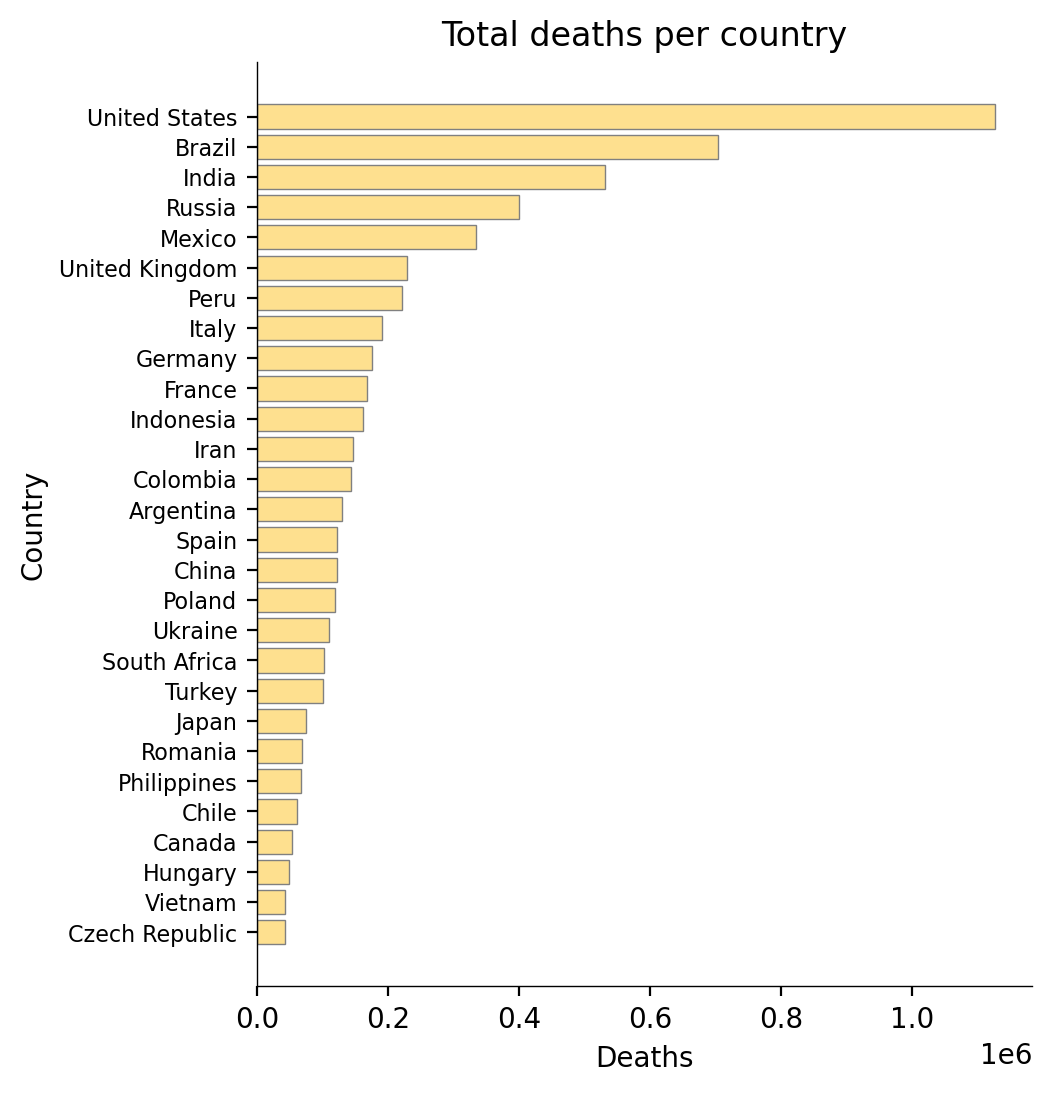

In [70]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots(1, 1, figsize=(5,6))
y_pos = np.arange(len(countries))
barcontainers = ax.barh(y_pos, deaths, color='#FEE08F')
ax.invert_yaxis() 
ax.set_yticks(y_pos)
ax.set_yticklabels(countries, fontsize=8, horizontalalignment="right")

for rect in barcontainers.patches:
    rect.set_linewidth(.5)
    rect.set_edgecolor('grey')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)

ax.set_title("Total deaths per country")
ax.set_xlabel("Deaths")
ax.set_ylabel("Country")

plt.show()

### An alternative 

In [71]:
table_rates = soup.find(id="covid-19-cases-deaths-and-rates-by-location")

In [72]:
table_rates2 = table_rates.find("table")

## Exercise for you: 
Make a plot with the total death per region.